In [52]:
import pickle
import sys
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from scipy.spatial import distance
sys.path.insert(0, './../preprocessing')

import session as ss

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def cosine_sim(a, b):
    return b.apply(lambda x: distance.cosine(a,x), axis=1)

def topK(K,centroid,data,similarity_measure=euclidean_distance):
    df = data.copy()
    df['distance'] = similarity_measure(centroid, data.loc[:, data.columns != 'label'])#np.linalg.norm(centroid - data.loc[:, data.columns != 'label'], axis=1) 
    df = df.sort_values(by=['distance'])
    return df.head(K)

embedding_size = 100
embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % embedding_size, sep='\t', header=None, dtype=float)
labels = pd.read_csv('word2vec_preprocessed_embeddings/labels_%d.csv' % embedding_size, sep='\t', header=None, dtype=str)

kmeans = KMeans(n_clusters=10).fit(embeddings)

centroids = kmeans.cluster_centers_

embeddings['label'] = labels
df = embeddings.copy()

for i, c in enumerate(centroids):
    top10 = topK(K=10, centroid=c, data=embeddings, similarity_measure=euclidean_distance)
    df['c%d' % i] = df.index.isin(top10.index)
    print('cluster %d' % i)
    print(top10['label'])
    print()


cluster 0
54             click_on_give_read_access
209                  click_on_mobile_sub
210                    click_on_feedback
14               click_on_administrators
197               click_on_remove_access
128                      click_on_change
205    click_on_did_you_notice_new_login
199             click_on_role_department
150                 click_on_give_access
19                      click_on_company
Name: label, dtype: object

cluster 1
210                    click_on_feedback
205    click_on_did_you_notice_new_login
209                  click_on_mobile_sub
207                       go_back_to_top
204     order_overview_check_locked_subs
0                          load_homepage
133                  click_on_magic_link
201                      click_on_filter
154      click_whether_you_can_get_fiber
56                    GDPR_related_click
Name: label, dtype: object

cluster 2
210                    click_on_feedback
209                  click_on_mobile_sub
203         

In [25]:
for i, c in enumerate(centroids):
    top10 = topK(K=10, centroid=c, data=embeddings, similarity_measure=cosine_sim)
    print('cluster %d' % i)
    print(top10['label'])
    print()

cluster 0
79                  click_on_billed
161                   click_on_user
5           click_on_number_details
136               select_no_binding
180               click_on_show_all
200            scroll_on_page_costs
34     click_on_subscription_detail
27              click_on_time_range
175            click_on_mbn_details
66           click_on_notifications
Name: label, dtype: object

cluster 1
113                        click_on_select
41                            submit_order
40                            activate_new
39                     click_on_self_owner
18              click_next_in_subscr_order
90                   click_on_no_data_incl
45                       click_on_activate
167                 click_on_add_post_code
132    click_new_subscription_from_scratch
171                          click_on_copy
Name: label, dtype: object

cluster 2
190                      click_on_stocking
94     click_on_locations_of subscriptions
26                click_on_unpaid_invo

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = df.loc[:, df.columns[0:100]]
pc = pca.fit_transform(data)
df['pc1'] = pc[:,0]
df['pc2'] = pc[:,1]

pcc = pca.fit_transform(centroids)
pcc = pd.DataFrame(data = pc_centroids, columns = ['x', 'y'])
#df.head(10)


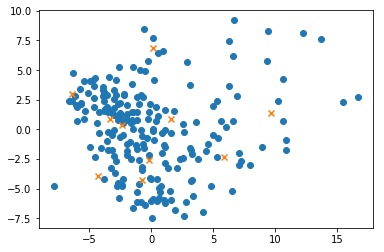

In [59]:
import matplotlib.pyplot as plt

plt.scatter(x=df['pc1'], y=df['pc2'])
plt.scatter(x=pcc['x'], y=pcc['y'], marker='x')
plt.show()

In [55]:
top_k_values = df.loc[:, df.columns[101:111]]
top_k_values.head(10)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False
